# ANN classification model
''' Model Definition
    Model structure:


    -> Dense Layer (100 , tanh)
    -> Dense Layer (100 , tanh)
    -> Dense Layer (1 , sigmoid)

'''

In [85]:
'''Importing all the necessary libraries'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [86]:
'''Data Preprocessing and removal of missing data'''

df = pd.read_excel('/content/King-RookvsKing-Pawn.xlsx') # Read the CSV
df['Column37']=data['Column37'].apply({'won':1,'nowin':0}.get) # Converting won to 1 and nowin to 0
df = data.dropna() # Removing all the missing data  
df.head(5) # Print the 5 top rows of the dataframe

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column11,Column12,Column13,Column14,Column15,Column16,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26,Column27,Column28,Column29,Column30,Column31,Column32,Column33,Column34,Column35,Column36,Column37
0,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,1.0
1,f,f,f,f,t,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,1.0
2,f,f,f,f,t,f,t,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,f,f,t,f,f,f,f,f,f,f,t,t,n,1.0
3,f,f,f,f,f,f,f,f,t,f,f,f,l,f,n,f,f,t,f,f,f,t,f,f,f,t,f,f,f,f,f,f,f,t,t,n,1.0
4,f,f,f,f,f,f,f,f,f,f,f,f,l,f,n,f,f,t,f,f,f,f,f,t,f,t,f,f,f,f,f,f,f,t,t,n,1.0


In [87]:
X = df.drop('Column37',axis=1) # Input features
y = df['Column37'] # Output features

In [88]:
''' Importing all the libraries '''

from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf

In [89]:
''' Apply one hot encoding on the data so as to encode catagorical variables into numberical values'''

cat_columns = X.select_dtypes('object').columns.to_list() # No of categoricalcolumns present in the featureset.
num_columns = X.select_dtypes(include = np.number).columns.to_list() # No of numerical columns present in the featureset.
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')  # Initializing the encoder 
encoder = encoder.fit(X[cat_columns]) # Fitting the encoder to our data 
encoded_cols  = list(encoder.get_feature_names(cat_columns)) 
X[encoded_cols] = encoder.transform(X[cat_columns])
train_and_test_data = X[num_columns + encoded_cols]

In [90]:
'''Perform a train test split on the data using sklearn's train_test_split method'''

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_and_test_data,y,train_size = 0.75, test_size = 0.25, random_state =101)

In [91]:
''' Initialize some variables to be used in model creation and model fitting'''

hidden_units=100 # No. of hidden units in each of the hiden layers 
learning_rate=0.01 # The learning rate of the Stochastic Gradient Descent optimizer
hidden_layer_act='tanh' # Activation layer of the hidden layers
output_layer_act='sigmoid' # Activation layer of the final layer
no_epochs= 3205 # Number of epochs of our model

In [92]:
''' Model Definition
    Model structure:
    -> Dense Layer (100 , tanh)
    -> Dense Layer (100 , tanh)
    -> Dense Layer (1 , sigmoid)

'''

model = Sequential()
model.add(Dense(hidden_units, input_dim=73, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))

In [93]:
'''Compiling our model with Stochastic Gradient Descent optimizer'''

sgd=tf.keras.optimizers.SGD(lr=learning_rate)  
model.compile(loss='binary_crossentropy',optimizer=sgd, metrics=['acc']) 

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [94]:
'''Model fitting with verbose equal to 2'''

model.fit(X_train, y_train, epochs=no_epochs, batch_size=len(train_and_test_data),  verbose=2) # verbose has been kept to 2 

Streaming output truncated to the last 5000 lines.
Epoch 706/3205
1/1 - 0s - loss: 0.2120 - acc: 0.9437
Epoch 707/3205
1/1 - 0s - loss: 0.2118 - acc: 0.9437
Epoch 708/3205
1/1 - 0s - loss: 0.2115 - acc: 0.9437
Epoch 709/3205
1/1 - 0s - loss: 0.2113 - acc: 0.9437
Epoch 710/3205
1/1 - 0s - loss: 0.2111 - acc: 0.9437
Epoch 711/3205
1/1 - 0s - loss: 0.2109 - acc: 0.9437
Epoch 712/3205
1/1 - 0s - loss: 0.2106 - acc: 0.9437
Epoch 713/3205
1/1 - 0s - loss: 0.2104 - acc: 0.9437
Epoch 714/3205
1/1 - 0s - loss: 0.2102 - acc: 0.9437
Epoch 715/3205
1/1 - 0s - loss: 0.2099 - acc: 0.9437
Epoch 716/3205
1/1 - 0s - loss: 0.2097 - acc: 0.9437
Epoch 717/3205
1/1 - 0s - loss: 0.2095 - acc: 0.9437
Epoch 718/3205
1/1 - 0s - loss: 0.2093 - acc: 0.9437
Epoch 719/3205
1/1 - 0s - loss: 0.2090 - acc: 0.9437
Epoch 720/3205
1/1 - 0s - loss: 0.2088 - acc: 0.9437
Epoch 721/3205
1/1 - 0s - loss: 0.2086 - acc: 0.9437
Epoch 722/3205
1/1 - 0s - loss: 0.2084 - acc: 0.9433
Epoch 723/3205
1/1 - 0s - loss: 0.2081 - acc: 0.

In [95]:
''' Calculation of test data accuracy using our model '''

from sklearn.metrics import accuracy_score, confusion_matrix # Import of necessary modules

test_preds = model.predict(X_test) # Predicting our test data
rounded = [int(round(x[0])) for x in test_preds] # As our sigmoid layer results in output between 0 and 1 so we have to round it to the nearest integer
test_score = accuracy_score(rounded, y_test) # Find the accuracy
print('The Test score is :', test_score*100 , '%')

The Test score is : 96.74593241551939 %


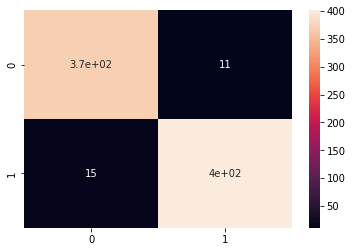

In [96]:
'''confusion_matrix of our test data'''

matrix = confusion_matrix(y_test, rounded) # Create a confusion matrix of our data
sns.heatmap(matrix, annot=True);